In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

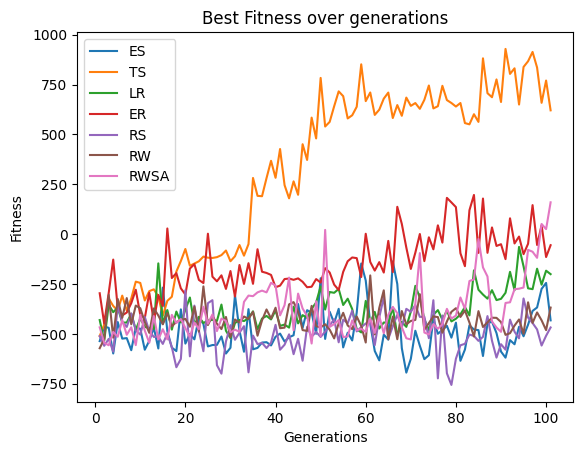

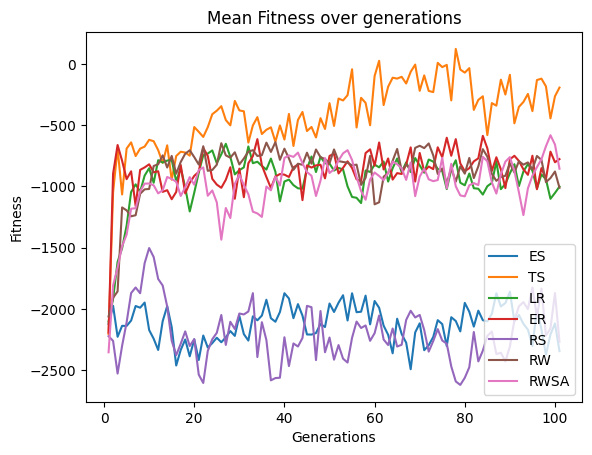

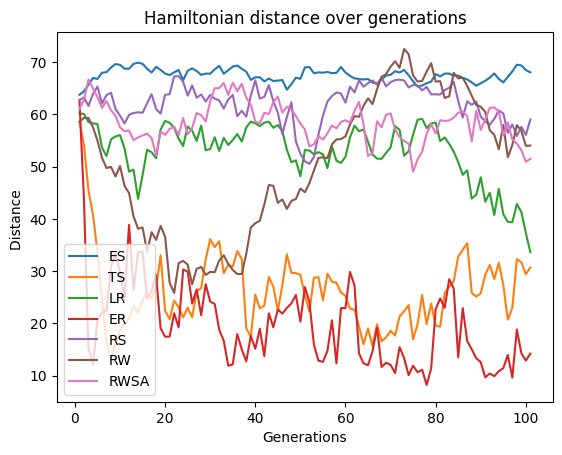

AttributeError: 'list' object has no attribute 'items'

<Figure size 640x480 with 0 Axes>

In [2]:
# Indexing for the generations

generations = 100
population_size = 48
max_tree_size = 30

sel_list = [
    'ES',
    # 'TS+E',
    # 'LR+E',
    # 'ER+E',
    'TS',
    'LR',
    'ER',
    'RS',
    'RW',
    'RWSA'
]

def get_dataframes_from_data(sel_list: list) -> dict:
    evo_list = {}
    for sel in sel_list:
        evo_list[sel] = pd.read_csv(f'results/{sel}_{generations}_{population_size}_{max_tree_size}.csv')
    return evo_list
    

evo_list = get_dataframes_from_data(sel_list)

generation_index = np.arange(1, generations + 2)

# Create a figure with 4 subplots
plt.figure()
for name in sel_list:
    plt.plot(generation_index, evo_list[name]['Best Fitness'], label=f'{name}')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Best Fitness over generations')
plt.legend()
plt.show()

# Mean fitness
plt.figure()
for name in sel_list:
    plt.plot(generation_index, evo_list[name]['Average Fitness'], label=f'{name}')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Mean Fitness over generations')
plt.legend()
plt.show()

# Variability in trees
plt.figure()
for name in sel_list:
    plt.plot(generation_index, evo_list[name]['Diversity Population'], label=f'{name}')
plt.xlabel('Generations')
plt.ylabel('Distance ')
plt.title('Hamiltonian distance over generations')
plt.legend()
plt.show()

# Box plot different methods
plt.figure()
final_fitness_data = [[x.fitness for x in evo_list[name]['']] for name, sel in sel_list.items()]
plt.boxplot(final_fitness_data, tick_labels=sel_list)
plt.xlabel('Selection methods')
plt.ylabel('Fitness')
plt.title('Box Plot of Final Fitness')
plt.show()

# Adjust layout
plt.tight_layout()
plt.show()
